# Determining the number of clusters in a data set

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DK23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load DataSet

In [4]:
data = pd.read_csv('E:\Final_Data.csv', index_col=0)
data.head()
#data.info()

,Title,Content
0,punishment crimes committed substance susch co...,person kills attempts cause death child woman ...
1,punishment abduction wimen children,person human trafficking prevention suppressio...
2,punishment ransom,person detains woman child ransom person shall...
3,punishment rapem death due rape,man rapes woman child shall punishable death p...
4,punishment inciting women commit suicide,woman commits suicide without consent woman pe...


## TF-IDF
#### Word 2 Vec can be used instead of tf-idf  

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
#unicode
documents = data['Content'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)
features

<200x1097 sparse matrix of type '<class 'numpy.float64'>'
	with 4960 stored elements in Compressed Sparse Row format>

## Elbow Method

In [7]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

## Ploting the figure

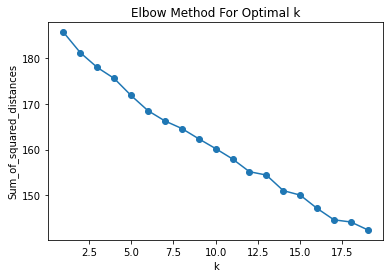

In [8]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()